In [ ]:
24

In [1]:
import numpy as np
import pandas as pd
from pmdarima import auto_arima

#### CREATE THE SERIES VALUES

In [2]:
datos = [21.5294, 21.5228, 21.5289, 21.5096, 21.506, 21.5119, 21.5173, 21.5308, 21.5355, 21.5181, 21.5, 21.4972, 21.5067, 21.5149, 
         21.4994, 21.4967, 21.4774, 21.4662, 21.4752, 21.4858, 21.4581, 21.4398, 21.4385, 21.4471, 21.4399, 21.444, 
         21.4555, 21.4366, 21.4402, 21.4371, 21.4317, 21.4342, 21.411, 21.4174, 21.4149, 21.4151, 21.4186, 21.4411, 
         21.4569, 21.4628, 21.448, 21.4468, 21.4357, 21.4329, 21.4543, 21.4429, 21.4478, 21.4423, 21.4536, 21.4416, 
         21.4384, 21.4378, 21.4622, 21.4413, 21.4315, 21.4419, 21.4323, 21.429, 21.4103, 21.4194, 21.4364, 21.4245, 
         21.4348, 21.4276, 21.4113, 21.4235, 21.407, 21.412, 21.4263, 21.431, 21.4362, 21.432, 21.4445, 21.4487, 
         21.4623, 21.4766, 21.4785, 21.4891, 21.4869, 21.4903, 21.4839, 21.4856, 21.4909, 21.5048, 21.5005, 21.4905, 
         21.4906, 21.4914, 21.5052, 21.4898, 21.5232, 21.5234, 21.5086, 21.5108, 21.5017, 21.5141, 21.5055, 21.4953, 
         21.4618, 21.4504, 21.4667, 21.4602, 21.453, 21.4497, 21.4446, 21.4308, 21.4347, 21.4512, 21.4675, 21.4675, 
         21.465, 21.4624, 21.4682, 21.472, 21.4632, 21.4644, 21.4615, 21.4604, 21.4679, 21.4672]

#### CREATE DATES INDEX

In [3]:
#indice = pd.date_range("2020-10-31 23:57:00", periods = len(datos))
indice = pd.date_range("2020-10-31 23:57:00", periods = len(datos), freq = "T")

#### CONCAT DATE & VALUES

In [4]:
Data = pd.Series(data = datos, index = indice)

#### CHECK SEASONALITY

#### Issue with freq = 'T'

When we use freq = 'T' --> we get this error "ValueError: freq T not understood. Please report if you think this is in error."

In [5]:
from statsmodels.tsa.seasonal import seasonal_decompose
decomposition = seasonal_decompose(Data)
decomposition.plot()

ValueError: freq T not understood. Please report if you think this is in error.

##### So DECOMPOSITION Plot need to be created seperately with applying freq = 'T'.

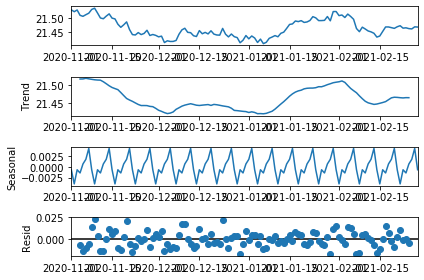

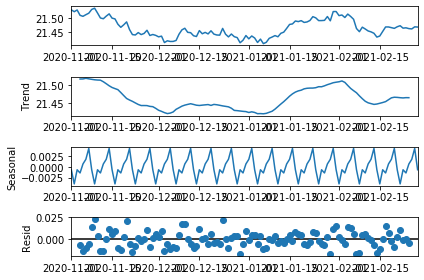

In [34]:
from statsmodels.tsa.seasonal import seasonal_decompose
decomposition = seasonal_decompose(Data)
decomposition.plot()

In [14]:
Data = Data.asfreq('T')

#### CHECK INITIAL PLOT

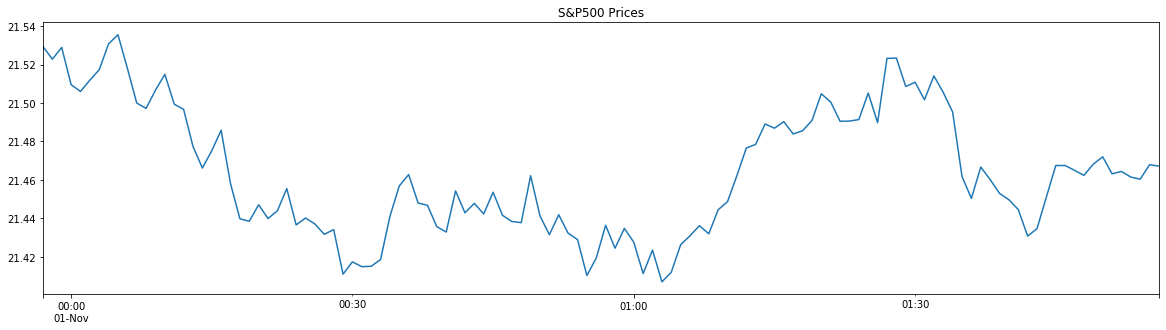

In [6]:
Data.plot(figsize=(20,5), title = "S&P500 Prices")

#### FIT < auto_arima > MODEL

As our Data does not have SEASONAL component we will assign seasonal = False
And choose start and max values for p, d & q. 

In [14]:
model_fit = auto_arima(Data,
                       start_p = 0, max_p = 6,
                       start_q = 0, max_q = 3,
                       seasonal = False,
                       trace = True)

model_fit.summary()

Performing stepwise search to minimize aic
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=1078.473, Time=0.01 sec
 ARIMA(1,0,0)(0,0,0)[0]             : AIC=inf, Time=0.11 sec
 ARIMA(0,0,1)(0,0,0)[0]             : AIC=inf, Time=0.07 sec
 ARIMA(1,0,1)(0,0,0)[0]             : AIC=-707.323, Time=0.17 sec
 ARIMA(2,0,1)(0,0,0)[0]             : AIC=-702.082, Time=0.35 sec
 ARIMA(1,0,2)(0,0,0)[0]             : AIC=-653.211, Time=0.15 sec
 ARIMA(0,0,2)(0,0,0)[0]             : AIC=inf, Time=0.11 sec
 ARIMA(2,0,0)(0,0,0)[0]             : AIC=inf, Time=0.15 sec
 ARIMA(2,0,2)(0,0,0)[0]             : AIC=-679.547, Time=0.37 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=-720.356, Time=0.12 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=-590.239, Time=0.15 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=-722.662, Time=0.10 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=-475.518, Time=0.03 sec
 ARIMA(2,0,0)(0,0,0)[0] intercept   : AIC=-720.684, Time=0.17 sec
 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=-719.642, T

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                  120
Model:               SARIMAX(1, 0, 0)   Log Likelihood                 364.331
Date:                Thu, 19 May 2022   AIC                           -722.662
Time:                        22:18:50   BIC                           -714.299
Sample:                             0   HQIC                          -719.266
                                - 120                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      1.6975      0.648      2.618      0.009       0.427       2.968
ar.L1          0.9209      0.030     30.503      0.000       0.862       0.980
sigma2         0.0001   1.72e-05      7.758      0.000    9.95e-05       0.000
===================================================================================
Ljung-Box (L1) (Q):                   0.02   Jarque-Bera (JB):                 0.03
Prob(Q):                              0.88   Prob(JB):                         0.99
Heteroskedasticity (H):               0.84   Skew:                            -0.00
Prob(H) (two-sided):                  0.57   Kurtosis:                         3.08
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

#### SMALL p, d & q Values --> (AR I MA -- Order)

ARIMA (p, d, q) [2, 2, 3] denotes an ARIMA Model

p = Trend Autoregressive Lags

d = Trend Difference in the order of d

q = Trend Moving Average Lags

Small case p, d & q applied when there is NO SEASONALITY in our Dataset.

In [12]:
model_fit.order

(1, 0, 0)

#### UPPER P, D, Q & m Values --> (S AR I MA -- Order)

SARIMA: (p, d, q)(P, D, Q)m == (3,1,0)(1,1,0)12

Feeded as seasonal_order = (1, 1, 0, 12)

P = Seasonal Autoregressive Lags,

D = Seasonal Difference in the order of d

Q = Seasonal Moving Average Lags

m = No. of time steps for a single seasonal period.

Such as 12 months, 4 quarters, etc.

Upper case P, D, Q & m applied when there is SEASONALITY in our Dataset.

In [13]:
model_fit.seasonal_order

(0, 0, 0, 0)